In [1]:
using FFTW
using SpecialFunctions
using LinearAlgebra
using Elliptic
using RowEchelon
using Plots
using JLD2
using FileIO
using DelimitedFiles
using UnicodePlots

In [8]:
function ReadingAgain(shit,number,M)
    health = load(shit,"hello") 
    println("I lived bitch") 
    Nx = 1024
    uno = ones(Float64,Nx)
    L = real(health[number,1])
    dmu = 2*pi/L/M
    Maxs = zeros(Float64,M+1)
    a = -pi/L
    b = pi/L
    mew = collect(a:dmu:b)
    println(length(mew))
    c = real(health[number,2])
    u = health[number,6:Nx+5]
    et = health[number,Nx+6:2*Nx+5]
    shit = nothing
    kaps = collect(1:Nx)
    k = ([0;kaps;-kaps[Nx:-1:1]])*2*pi/L
    ku = ([mew[1];kaps+mew[1]*uno;-kaps[Nx:-1:1]+mew[1]*uno])*2*pi/L
    Ker = tanh.(ku)
    
    
    B = zeros(Complex{Float64},4*Nx+2,4*Nx+2)
    B[1:2*Nx+1,1:2*Nx+1] = QuartersBitch(u,0.0,Nx)
    B[2*Nx+2:4*Nx+2,2*Nx+2:4*Nx+2] .= B[1:2*Nx+1,1:2*Nx+1]
    B[1:2*Nx+1,2*Nx+2:4*Nx+2] = QuartersBitch(et,0.0,Nx)
    D = zeros(Complex{Float64},4*Nx+2,4*Nx+2)
    D[1:2*Nx+1,1:2*Nx+1] = QuartersBitch1(u,Nx)
    D[2*Nx+2:4*Nx+2,2*Nx+2:4*Nx+2] .= D[1:2*Nx+1,1:2*Nx+1]
    D[1:2*Nx+1,2*Nx+2:4*Nx+2] = QuartersBitch1(et,Nx)
    for j in 1:2*Nx+1
       B[j,j] = c*k[j]*1im
       B[j+2*Nx+1,j+2*Nx+1] = c*k[j]*1im
       B[j,j+2*Nx+1] = -1im*k[j]
       D[j,j] = c*1im
       D[j+2*Nx+1,j+2*Nx+1] = c*1im
       D[j,j+2*Nx+1] = -1im
    end
    
    Eigs = Eigenmaker(et,u,mew[1],Ker,c,B,D,Nx)
    Maxs[1] = maximum(real(Eigs))
    plt = plot([0.0],[0.0],seriestype=:scatter)
    for pp in 1:4*Nx+2
        if abs(real(Eigs[pp])) > 5*10^(-8)
            push!(plt,real(Eigs[pp]),imag(Eigs[pp]))
        end
    end    
    for ppp in 2:M+1
        println(ppp)
        ku = ([mew[ppp];kaps+mew[ppp]*uno;-kaps[Nx:-1:1]+mew[ppp]*uno])*2*pi/L
        Ker = tanh.(ku)
        Eigs = Eigenmaker(et,u,mew[ppp],Ker,c,B,D,Nx)
        Maxs[ppp] = maximum(real(Eigs))
        for pp in 1:4*Nx+2
            if abs(real(Eigs[pp])) > 5*10^(-8)
                push!(plt,real(Eigs[pp]),imag(Eigs[pp]))
            end
        end
        if ppp % 10 == 0
            display(plt)
        end
    end
    display(plot(mew,Maxs))
end

ReadingAgain (generic function with 1 method)

In [9]:
function ReadingClose(shit,number,M)
    health = load(shit,"hello") 
    println("I lived bitch") 
    Nx = 1024
    uno = ones(Float64,Nx)
    L = real(health[number,1])
    dmu = pi/8/L/M
    Maxs = zeros(Float64,M+1)
    a = -pi/L/16
    b = pi/L/16
    mew = collect(a:dmu:b)
    c = real(health[number,2])
    u = health[number,6:Nx+5]
    et = health[number,Nx+6:2*Nx+5]
    kaps = collect(1:Nx)
    k = ([0;kaps;-kaps])*2*pi/L
    ku = ([mew[1];kaps+mew[1]*uno;-kaps+mew[1]*uno])*2*pi/L
    Ker = tanh.(ku)
    B = zeros(Complex{Float64},4*Nx+2,4*Nx+2)
    B[1:2*Nx+1,1:2*Nx+1] = QuartersBitch(u,0.0,Nx)
    B[2*Nx+2:4*Nx+2,2*Nx+2:4*Nx+2] .= B[1:2*Nx+1,1:2*Nx+1]
    B[1:2*Nx+1,2*Nx+2:4*Nx+2] = QuartersBitch(et,0.0,Nx)
    D = zeros(Complex{Float64},4*Nx+2,4*Nx+2)
    D[1:2*Nx+1,1:2*Nx+1] = QuartersBitch1(u,Nx)
    D[2*Nx+2:4*Nx+2,2*Nx+2:4*Nx+2] .= D[1:2*Nx+1,1:2*Nx+1]
    D[1:2*Nx+1,2*Nx+2:4*Nx+2] = QuartersBitch1(et,Nx)
    for j in 1:2*Nx+1
       B[j,j] = c*k[j]*1im
       B[j+2*Nx+1,j+2*Nx+1] = c*k[j]*1im
       B[j,j+2*Nx+1] = -1im*k[j]
       D[j,j] = c*1im
       D[j+2*Nx+1,j+2*Nx+1] = c*1im
       D[j,j+2*Nx+1] = -1im
    end
    Eigs = Eigenmaker(et,u,mew[1],Ker,c,B,D,Nx)
    Maxs[1] = maximum(real(Eigs))
    plt = plot([0.0],[0.0],seriestype=:scatter)
    for pp in 1:4*Nx+2
        if abs(real(Eigs[pp])) > 5*10^(-8)
            if abs(imag(Eigs[pp])) < 100
                push!(plt,real(Eigs[pp]),imag(Eigs[pp]))
            end
        end
    end    
    for ppp in 2:M+1
        println(ppp)
        ku = ([mew[ppp];kaps+mew[ppp]*uno;-kaps+mew[ppp]*uno])*2*pi/L
        Ker = tanh.(ku)
        Eigs = Eigenmaker(et,u,mew[ppp],Ker,c,B,D,Nx)
        Maxs[ppp] = maximum(real(Eigs))
        for pp in 1:4*Nx+2
            if abs(real(Eigs[pp])) > 5*10^(-8)
                if abs(imag(Eigs[pp])) < 100
                    push!(plt,real(Eigs[pp]),imag(Eigs[pp]))
                end
            end
        end
        if ppp % 10 == 0
            display(plt)
        end
    end
    display(plot(mew,Maxs))
end

ReadingClose (generic function with 1 method)

In [10]:
function ReadingCloser(shit,number,M)
    health = load(shit,"hello") 
    println("I lived bitch") 
    Nx = 1024
    uno = ones(Float64,Nx)
    L = real(health[number,1])
    dmu = pi/10/L/M
    Maxs = zeros(Float64,M+1)
    a = -pi/L/20
    b = pi/L/20
    mew = collect(a:dmu:b)
    c = real(health[number,2])
    u = health[number,6:Nx+5]
    et = health[number,Nx+6:2*Nx+5]
    kaps = collect(1:Nx)
    ku = ([mew[1];kaps+mew[1]*uno;-kaps+mew[1]*uno])*2*pi/L
    Ker = tanh.(ku)./ku
    Eigs = Eigenmaker(et,u,mew[1],ku,Ker,c,Nx)
    Maxs[1] = maximum(real(Eigs))
    plt = plot([0.0],[0.0],seriestype=:scatter)
    for pp in 1:4*Nx+2
        if abs(real(Eigs[pp])) > 5*10^(-8)
            if abs(imag(Eigs[pp])) < 100
                push!(plt,real(Eigs[pp]),imag(Eigs[pp]))
            end
        end
    end    
    for ppp in 2:M+1
        println(ppp)
        ku = ([mew[ppp];kaps+mew[ppp]*uno;-kaps+mew[ppp]*uno])*2*pi/L
        Ker = tanh.(ku)
        Eigs = Eigenmaker(et,u,mew[ppp],ku,Ker,c,Nx)
        Maxs[ppp] = maximum(real(Eigs))
        for pp in 1:4*Nx+2
            if abs(real(Eigs[pp])) > 5*10^(-8)
                if abs(imag(Eigs[pp])) < 100
                    push!(plt,real(Eigs[pp]),imag(Eigs[pp]))
                end
            end
        end
        if ppp % 10 == 0
            display(plt)
        end
    end
    display(plot(mew,Maxs))
end

ReadingCloser (generic function with 1 method)

In [11]:
function ReadingAgain1(shit,number,M)
    health = load(shit,"hello") 
    println("I lived bitch") 
    Nx = 1024
    uno = ones(Float64,Nx)
    L = real(health[number,1])
    dmu = 2*pi/L/M
    Maxs = zeros(Float64,M+1)
    a = -pi/L
    b = pi/L
    mew = collect(a:dmu:b)
    c = real(health[number,2])
    u = health[number,6:Nx+5]
    et = health[number,Nx+6:2*Nx+5]
    kaps = collect(1:Nx)
    ku = ([mew[1];kaps+mew[1]*uno;-kaps+mew[1]*uno])*2*pi/L
    Ker = tanh.(ku)./ku
    Eigs = Eigenmaker(et,u,mew[1],ku,Ker,c,Nx)
    Maxs[1] = maximum(real(Eigs))
    plt = plot([0.0],[0.0],seriestype=:scatter)
    for pp in 1:4*Nx+2
        if abs(real(Eigs[pp])) > 5*10^(-8)
            push!(plt,real(Eigs[pp]),imag(Eigs[pp]))
        end
    end    
    display(plt)
    for ppp in 2:M+1
        println(ppp)
        ku = ([mew[ppp];kaps+mew[ppp]*uno;-kaps+mew[ppp]*uno])*2*pi/L
        if mew[ppp] == 0
            Ker[1] = 1
            Ker[2:2*Nx+1] = tanh.(ku[2:2*Nx+1])./ku[2:2*Nx+1]
        else
            Ker = tanh.(ku)./ku
        end
        Eigs = Eigenmaker(et,u,mew[ppp],ku,Ker,c,Nx)
        Maxs[ppp] = maximum(real(Eigs))
        for pp in 1:4*Nx+2
            if abs(real(Eigs[pp])) > 5*10^(-8)
                push!(plt,real(Eigs[pp]),imag(Eigs[pp]))
            end
        end
        display(plt)
    end
    savefig(plt,"imagstable2piHP.pdf")
    display(plot(mew,Maxs))
    savefig("realmaxs2piHP.pdf")
end

ReadingAgain1 (generic function with 1 method)

In [12]:
function QuartersBitch(et,mu,Nx)
    Quar = zeros(Complex{Float64},2*Nx+1,2*Nx+1)
    for j in 1:Nx
        Quar[1,j+1] = -et[j]*(1im*(mu))
        Quar[1,2*Nx+2-j] = -et[j]*(1im*(mu))
        Quar[j+1,1] = -et[j]*(1im*(mu+j))
        Quar[2*Nx+2-j,1] = -et[j]*(1im*(mu-j))
        for jj in 1:Nx
            if j != jj
                Quar[j+1,jj+1] = -et[abs(jj-j)]*(1im*(mu+j)) 
            end
        end
        for jj in 1:Nx-j
            Quar[j+1,2*Nx+2-jj] = -et[abs(j+jj)]*(1im*(mu+j))
        end
    end
    for j in 1:Nx
        for jj in 1:Nx
            if j != jj
                Quar[2*Nx+2-j,2*Nx+2-jj] = -et[abs(j-jj)]*(1im*(mu-j))
            end
        end
        for jj in 1:Nx-j
            Quar[2*Nx+2-j,jj+1] = -et[abs(j+jj)]*(1im*(mu-j))
        end
    end
    return Quar
end

QuartersBitch (generic function with 1 method)

In [13]:
function QuartersBitch1(et,Nx)
    Quar = zeros(Complex{Float64},2*Nx+1,2*Nx+1)
    for j in 1:Nx
        Quar[1,j+1] = -et[j]*1im
        Quar[1,2*Nx+2-j] = -et[j]*1im
        Quar[j+1,1] = -et[j]*1im
        Quar[2*Nx+2-j,1] = -et[j]*1im
        for jj in 1:Nx
            if j != jj
                Quar[j+1,jj+1] = -et[abs(j-jj)]*1im
            end
        end
        for jj in 1:Nx-j
            Quar[j+1,2*Nx+2-jj] = -et[abs(j+jj)]*1im
        end
    end
    for j in 1:Nx
        for jj in 1:Nx
            if j != jj
                Quar[2*Nx+2-j,2*Nx+2-jj] = -et[abs(jj-j)]*1im
            end
        end
        for jj in 1:Nx-j
            Quar[2*Nx+2-j,jj+1] = -et[abs(j+jj)]*1im
        end
    end
    return Quar
end

QuartersBitch1 (generic function with 1 method)

In [14]:
function Eigenmaker(et,u,mu,Ker,c,B,D,Nx)
    Jack = -1im*Ker
    Jimmy = D*mu
    for j in 1:2*Nx+1
        Jimmy[j+2*Nx+1,j] = Jack[j]
    end
    Jimmy = B + Jimmy
    ###display(UnicodePlots.spy(abs.(Jimmy))) to print out the spy of the dense matrix
    Eigs = eigvals(Jimmy)
    return Eigs
end

Eigenmaker (generic function with 1 method)

In [15]:
function Eigentester(et,u,mu,Ker,c,B,D,Nx)
    ### Done [et; u]
    Jack = -1im*Ker
    Jimmy = D*mu
    for j in 1:2*Nx+1
        Jimmy[j+2*Nx+1,j] = Jack[j]
    end
    Jimmy += B 
    Eigs = eigen(Jimmy)
    return Eigs
end

Eigentester (generic function with 1 method)

In [16]:
function ReadingOnce(shit,number)
    health = load(shit,"hello") 
    println("I lived bitch") 
    Nx = 1024
    uno = ones(Float64,Nx)
    L = real(health[number,1])
    mew = 0.25
    println(length(mew))
    c = real(health[number,2])
    u = health[number,6:Nx+5]
    et = health[number,Nx+6:2*Nx+5]
    kaps = collect(1:Nx)
    k = ([0;kaps;-kaps])*2*pi/L
    ku = ([mew;kaps+mew*uno;-kaps+mew*uno])*2*pi/L
    Ker = tanh.(ku)
    B = zeros(Complex{Float64},4*Nx+2,4*Nx+2)
    B[1:2*Nx+1,1:2*Nx+1] = QuartersBitch(u,0.0,Nx)
    B[2*Nx+2:4*Nx+2,2*Nx+2:4*Nx+2] .= B[1:2*Nx+1,1:2*Nx+1]
    B[1:2*Nx+1,2*Nx+2:4*Nx+2] = QuartersBitch(et,0.0,Nx)
    D = zeros(Complex{Float64},4*Nx+2,4*Nx+2)
    D[1:2*Nx+1,1:2*Nx+1] = QuartersBitch1(u,Nx)
    D[2*Nx+2:4*Nx+2,2*Nx+2:4*Nx+2] .= D[1:2*Nx+1,1:2*Nx+1]
    D[1:2*Nx+1,2*Nx+2:4*Nx+2] = QuartersBitch1(et,Nx)
    for j in 1:2*Nx+1
       B[j,j] = c*ku[j]*1im
       B[j+2*Nx+1,j+2*Nx+1] = c*ku[j]*1im
       B[j,j+2*Nx+1] = -1im*ku[j]
    end
    Eigs = Eigentester(et,u,mew,Ker,c,B,D,Nx)
    Maxs = maximum(real(Eigs.values))
    println("Max of values is: ",Maxs)
    plt = plot([0.0],[0.0],seriestype=:scatter)
    for pp in 1:4*Nx+2
        if abs(real(Eigs.values[pp])) > 5*10^(-8)
            push!(plt,real(Eigs.values[pp]),imag(Eigs.values[pp]))
        end
    end  
    display(plt)
    p = 0
    for jj in 1:4*Nx+2
        if real(Eigs.values[jj]) == Maxs
            p = jj
        end
    end
    Vecs = Eigs.vectors[:,p]
    Newu = zeros(Complex{Float64},4*Nx+1)
    Newet = zeros(Complex{Float64},4*Nx+1)
    println("First six: ",Vecs[1:6])
    println("Norm of first half: ",norm(Vecs[1:2*Nx+2]))
    Vecs = 5*10^(-7)*Vecs/abs(Vecs[2])
    for jj in 1:Nx-1
        Newu[jj*4] = conj(Vecs[3*Nx+2+jj])
        Newu[jj*4+1] = u[jj]
        Newu[jj*4+2] = Vecs[jj+2+2*Nx]
        Newet[jj*4] = conj(Vecs[Nx+1+jj])
        Newet[jj*4+1] = et[jj]
        Newet[jj*4+2] = Vecs[jj+1]
    end
    println("Maximum of Eigvec: ",maximum(abs.(Vecs)))
    Newu[4*Nx] = conj(Vecs[2+4*Nx])
    Newet[4*Nx] = conj(Vecs[1+2*Nx])
    Newu[4*Nx+1] = u[Nx]
    Newet[Nx*4+1] = et[Nx]
    Newet[2] = Vecs[1]
    Newu[2] = Vecs[2*Nx+2]
    uIC = abs(Newu[6])
    nIC = abs(Newet[6])
    println([uIC;nIC])
    r = irfft(Newet,8*Nx)*8*Nx
    s = irfft(Newu,8*Nx)*8*Nx
    display(plot(imag(r)))
    tot = log(6*10^(-7)/nIC)/Maxs
    println("Total time for pert increase",tot)
    mainwave(8*Nx,s,r,uIC,nIC,Maxs,tot,10^(-1),c,10000,L)
    return "Goodluck"
end

ReadingOnce (generic function with 1 method)

In [17]:
function CanIRead(shit,number)
    health = load(shit,"hello") 
    println("I lived bitch") 
    Nx = 1024
    uno = ones(Float64,Nx)
    L = real(health[number,1])
    mew = 1/4
    c = real(health[number,2])
    u = health[number,6:Nx+5]
    et = health[number,Nx+6:2*Nx+5]
    kaps = collect(1:Nx)
    k = ([0;kaps;-kaps[Nx:-1:1]])*2*pi/L
    ku = ([mew;kaps+mew*uno;-kaps[Nx:-1:1]+mew*uno])*2*pi/L
    Ker = tanh.(ku)
    Newu = zeros(Complex{Float64},4*Nx+1)
    Newet = zeros(Complex{Float64},4*Nx+1)
    
    B = zeros(Complex{Float64},4*Nx+2,4*Nx+2)
    B[1:2*Nx+1,1:2*Nx+1] = QuartersBitch(u,0.0,Nx)
    B[2*Nx+2:4*Nx+2,2*Nx+2:4*Nx+2] .= B[1:2*Nx+1,1:2*Nx+1]
    B[1:2*Nx+1,2*Nx+2:4*Nx+2] = QuartersBitch(et,0.0,Nx)
    D = zeros(Complex{Float64},4*Nx+2,4*Nx+2)
    D[1:2*Nx+1,1:2*Nx+1] = QuartersBitch1(u,Nx)
    D[2*Nx+2:4*Nx+2,2*Nx+2:4*Nx+2] .= D[1:2*Nx+1,1:2*Nx+1]
    D[1:2*Nx+1,2*Nx+2:4*Nx+2] = QuartersBitch1(et,Nx)
    for j in 1:2*Nx+1
       B[j,j] = c*ku[j]*1im
       B[j+2*Nx+1,j+2*Nx+1] = c*ku[j]*1im
       B[j,j+2*Nx+1] = -1im*ku[j]
    end
    
    Eigs = Eigentester(et,u,mew,Ker,c,B,D,Nx)
    Maxs = maximum(real(Eigs.values))
    println("Max of values is: ",Maxs)
    plt = plot([0.0],[0.0],seriestype=:scatter)
    for pp in 1:4*Nx+2
        if abs(real(Eigs.values[pp])) > 5*10^(-8)
            push!(plt,real(Eigs.values[pp]),imag(Eigs.values[pp]))
        end
    end  
    display(plt)
    
    p = 0
    for jj in 1:4*Nx+2
        if real(Eigs.values[jj]) == Maxs
            p = jj
        end
    end
    Vecs = Eigs.vectors[:,p]
    Newu = zeros(Complex{Float64},4*Nx+1)
    Newet = zeros(Complex{Float64},4*Nx+1)
    println("First six: ",Vecs[1:6])
    println("Norm of first half: ",norm(Vecs[1:2*Nx+2]))
    
    """
    Vecs = 5*10^(-7)*Vecs/abs(Vecs[2])
    for jj in 1:Nx-1
        Newupert[jj*4] = conj(Vecs[3*Nx+2+jj])
        Newupert[jj*4+2] = Vecs[jj+2+2*Nx]
        Newetpert[jj*4] = conj(Vecs[Nx+1+jj])
        Newetpert[jj*4+2] = Vecs[jj+1]
    end
    """
    for jj in 1:Nx
        Newet[jj*4+1] = et[jj]
        Newu[jj*4+1] = u[jj]
    end
    println("Maximum of Eigvec: ",maximum(abs.(Vecs)))
    """
    Newupert[4*Nx] = conj(Vecs[2+4*Nx])
    Newetpert[4*Nx] = conj(Vecs[1+2*Nx])
    Newetpert[1] = Vecs[1]
    Newupert[1] = Vecs[2*Nx+2]
    rpert = irfft(Newetpert,8*Nx)*8*Nx
    spert = irfft(Newupert,8*Nx)*8*Nx
    """
    rpert,spert = NewMethod(Vecs,Nx)
    r = irfft(Newet,8*Nx)*8*Nx
    s = irfft(Newu,8*Nx)*8*Nx
    
    display(plot(r))
    display(plot(s))
    norming = 10^(-6)/(maximum(real(rpert))-minimum(real(rpert)))
    rpert .*= norming
    spert .*= norming
    println("First few values of rpert: ",fft(rpert)[1:7])
    display(plot(real(rpert),xlabel = "x",ylabel = "etapert"))
    display(plot(real(spert),xlabel = "x",ylabel = "upert"))
    uIC = abs(Vecs[2*Nx+2])
    nIC = abs(Vecs[2])
    r += rpert
    s += spert
    tot = log(6*10^(-7)/nIC)/Maxs
    println("Total time for pert increase",tot)
    
    
    mainwave(8*Nx,s,r,1,1,1,5,10^(-1),c,5000,L)
    return "Goodluck"
end

CanIRead (generic function with 1 method)

In [22]:
function mainwave(Nx::Int64,u,n,uIC,nIC,Maxs,tot,tol,c,Q::Int64,L)
    w3 = 0.7845136104775600;
    w2 = 0.2355732133593570;
    w1 = -1.177679984178870;
    w0 = 1.3151863206839060;
    g = 1.0
    tau = 0
    h0 = 1.0
    ###Optimize length by adding Nx as a input to each function
    p = plan_fft(n)
    ip = plan_ifft(n)
    dt = tot/Q
    display(plot(real(n)))
    k = [0:(Nx/2); (-Nx/2+1):(-1)]*(2*Float64(pi)/(4*L))
    Ker = Kernel1(k,g,h0,Nx)
    pp = Array{Complex{Float64}, Nx}
    pp = p*n
    Time = collect(0:tot/Q:tot)
    Growth1 = zeros(Float64,Q+1)
    Growth2 = zeros(Float64,Q+1)
    Growth3 = zeros(Float64,Q+1)
    Growth1[1] = log(abs(pp[4]))
    Growth2[1] = log(abs(pp[6]))
    Growth3[1] = log(abs(pp[4]+pp[6]))
    for jj in 1:Q
        u,n = Linterm(u,n,h0,k,g,tau,w3*dt/2,Nx,p,ip)
        u,n = NonLinTerm(u,n,k,w3*dt,p,ip)
        u,n = Linterm(u,n,h0,k,g,tau,dt*(w3+w2)/2,Nx,p,ip)
        u,n = NonLinTerm(u,n,k,w2*dt,p,ip)
        u,n = Linterm(u,n,h0,k,g,tau,dt*(w2+w1)/2,Nx,p,ip)
        u,n = NonLinTerm(u,n,k,w1*dt,p,ip)
        u,n = Linterm(u,n,h0,k,g,tau,dt*(w1+w0)/2,Nx,p,ip)
        u,n = NonLinTerm(u,n,k,w0*dt,p,ip)
        u,n = Linterm(u,n,h0,k,g,tau,dt*(w1+w0)/2,Nx,p,ip)
        u,n = NonLinTerm(u,n,k,w1*dt,p,ip)
        u,n = Linterm(u,n,h0,k,g,tau,dt*(w2+w1)/2,Nx,p,ip)
        u,n = NonLinTerm(u,n,k,w2*dt,p,ip)
        u,n = Linterm(u,n,h0,k,g,tau,dt*(w3+w2)/2,Nx,p,ip)
        u,n = NonLinTerm(u,n,k,w3*dt,p,ip)
        u,n = Linterm(u,n,h0,k,g,tau,w3*dt/2,Nx,p,ip)
        if jj % (div(Q,10)) == 0
            display(plot(real(n)))
        end
        pp = p*n
        Growth1[jj+1] = log(abs(pp[4]))
        Growth2[jj+1] = log(abs(pp[6]))
        Growth3[jj+1] = log(abs(pp[4])+abs(pp[6]))
    end
    plt = plot(Growth1)
    plot!(plt,Growth2)
    plot!(plt,Growth3)
    display(plt)
    pp = p*n
    qq = p*u
    utime = exp(Maxs*tot)*uIC
    println("N error: ",abs(abs(pp[6])-Nx*6*10^(-7)))
    println("U Error: ",abs(abs(qq[6])-Nx*utime))
    if abs(abs(pp[6])-6*10^(-7)) < tol
        if abs(abs(qq[6])-utime) < tol
            return "WORKING BITCH"
        end
    end
    return "keep trying"
end

mainwave (generic function with 1 method)

In [19]:
function Linterm(u0,n0,h0,k,g,tau,dt,Nx,ft,ift)
    etahat = ft*(n0)
    uhat = ft*(u0)
    fac=sqrt.((g*k).*tanh.(h0*k))
    fact=fac*dt
    temp = fact
    etahatnew = zeros(Complex{Float64},Nx)
    uhatnew = zeros(Complex{Float64},Nx)
    for i in 2:Nx
        etahatnew[i]=etahat[i]*cos(fact[i])-1im*h0*k[i]/fac[i]*uhat[i]*sin(fact[i])
        uhatnew[i]=uhat[i]*cos(fact[i])-1im*fac[i]/h0/k[i]*etahat[i]*sin(fact[i])
    end
    etahatnew[1]=etahat[1]
    uhatnew[1]=uhat[1]
    
    u0 = ift*(uhatnew)
    n0 = ift*(etahatnew)
    return u0,n0
end

Linterm (generic function with 1 method)

In [20]:
function NonLinTerm(u0::Array{Complex{Float64}},n0::Array{Complex{Float64}},k,t,ft,ift)
    ###RK4 on the Nonlin terms
    m = length(u0)
    tempu = Array{Complex{Float64}}(undef,m)
    tempn = Array{Complex{Float64}}(undef,m)
    tempu .= u0
    tempn .= u0.*n0
    k1 =  -[ift*(ft*(tempu.^2)/2 .*k*1im);ift*(ft*(tempn)*1im.*k)]
    tempu .= u0+t/2*k1[1:m]
    tempn .= tempu.*(n0+t/2*k1[(m+1):(2m)])
    k2 =  -[ift*((ft*(tempu.^2))/2 .*k*1im);ift*(ft*(tempn)*1im.*k)] 
    tempu .= u0+t/2*k2[1:m]
    tempn .= tempu.*(n0+t/2*k2[(m+1):(2m)])
    k3 =  -[ift*((ft*(tempu.^2))/2 .*k*1im);ift*(ft*(tempn)*1im.*k)] 
    tempu .= u0+t*k3[1:m]
    tempn .=  tempu.*(n0+t*k3[(m+1):(2m)])
    k4 =  -[ift*((ft*(tempu.^2))/2 .*k*1im);ift*(ft*(tempn)*1im.*k)] 
    new = [u0;n0]+t/6*(k1+2*k2+2*k3+k4)
    return new[1:m],new[(m+1):(2*m)]
end

NonLinTerm (generic function with 1 method)

In [5]:
function Kernel1(k,g,h,Nx)
    Ker = Array{Complex{Float64}}(undef,Nx)
    Ker[1] = 1
    for jj in 2:Nx
       z = h*k[jj]
       tanh(z)/z 
    end
    return Ker
end

Kernel1 (generic function with 1 method)

In [6]:
function NewMethod(Vecs,Nx)
    x = collect(0:pi/Nx:8*pi-pi/Nx)
    upert = zeros(Complex{Float64},8*Nx)
    etpert = zeros(Complex{Float64},8*Nx)
    etpert += Vecs[1].*exp.(x*1im/4)
    upert += Vecs[2*Nx+2].*exp.(x*1im/4)
    for j in 1:Nx
       etpert += exp.(x*1im/4).*(Vecs[j+1].*exp.(j.*x*1im)+Vecs[2*Nx+2-j].*exp.(-j.*x.*1im))
        upert += exp.(x*1im/4).*(Vecs[2*Nx+j+2].*exp.(j.*x*1im)+Vecs[4*Nx+3-j].*exp.(-j.*x.*1im))
    end
    return etpert+conj(etpert),upert+conj(upert)
end

NewMethod (generic function with 1 method)

In [ ]:
function TravelingTester(filename,index,outname)    
    health = readdlm(filename)
    heal = health[index,:]
    health = nothing
    Nx = 4096
    uno = ones(Float64,Nx)
    L = real(heal[1])
    c = real(heal[2])
    eta = heal[4:Nx+3]
    uuu = heal[Nx+4:2*Nx+3]
    Diffs = zeros(Float64,10,2)
    i=0
    tol = 0
    while Nx>4
        i+=1
        dN= div(4096,Nx)
        etanew = eta[1:dN:4096]
        uuunew = uuu[1:dN:4096]
        diff = mainwave(Nx,uuunew,etanew,tol,c,5000,L)
        println(diff)
        Diffs[i,:] = [Nx diff]
        Nx = div(Nx,2)
        etanew = nothing
        uuunew = nothing
    end
    writedlm(outname,Diffs) 
end

In [ ]:
ReadingAgain("2pi.jld2",2,50)

In [ ]:
ReadingClose("2pi.jld2",2,50)

In [ ]:
ReadingCloser("2pi.jld2",2,100)

In [ ]:
ReadingCloser("2pi.jld2",1,100)

In [ ]:
ReadingAgain("2pi.jld2",20,50)

In [ ]:
ReadingAgain("2pi.jld2",55,50)

In [13]:
function lop(shit,N1,N2,N3,N4)
    help = readdlm(shit)
    L=real(help[1,1])
    Nx = 4096
    dx = L/Nx
    x = collect(0:dx:(L-dx))
    zero = zeros(Float64,Nx)
    plt1 = plot(x,zero,xlabel = "x", ylabel = "p",legend = false,color = :black)
    plt2 = plot(x,zero,xlabel = "x", ylabel = "q",legend = false,color = :black)
    et = help[N1,4:Nx+3]
    u = help[N1,Nx+4:2*Nx+3]
    plot!(plt1,x,real(et),color = :green)
    plot!(plt2,x,real(u),color = :green)
    et = help[N2,4:Nx+3]
    u = help[N2,Nx+4:2*Nx+3]
    plot!(plt1,x,real(et),color = :orange)
    plot!(plt2,x,real(u),color = :orange)
    et = help[N3,4:Nx+3]
    u = help[N3,Nx+4:2*Nx+3]
    plot!(plt1,x,real(et),color = :purple)
    plot!(plt2,x,real(u),color = :purple)
    et = help[N4,4:Nx+3]
    u = help[N4,Nx+4:2*Nx+3]
    plot!(plt1,x,real(et),color = :red)
    plot!(plt2,x,real(u),color = :red)
    plt3 = plot(real(help[:,2]),real(help[:,3]),xlabel = "c", ylabel = "H",legend = false)
    plot!(plt3,[real(help[N1,2])],[real(help[N1,3])],seriestype=:scatter,color = :green)
    plot!(plt3,[real(help[N2,2])],[real(help[N2,3])],seriestype=:scatter,color = :orange)
    plot!(plt3,[real(help[N3,2])],[real(help[N3,3])],seriestype=:scatter,color = :purple)
    plot!(plt3,[real(help[N4,2])],[real(help[N4,3])],seriestype=:scatter,color = :red)
    
    display(plt1)
    display(plt2)
    display(plt3)
    savefig(plt1,"Johnsolnseta.pdf")
    savefig(plt2,"Johnsolnsu.pdf")
    savefig(plt3,"Johnsolnscvsh.pdf")
end

lop (generic function with 1 method)

In [14]:
ReadingAgain("2pi.jld2",20,500)

UndefVarError: UndefVarError: ReadingAgain not defined

In [ ]:
ReadingOnce("2pi.jld2",20)

In [ ]:
ReadingOnce("2pi.jld2",55)

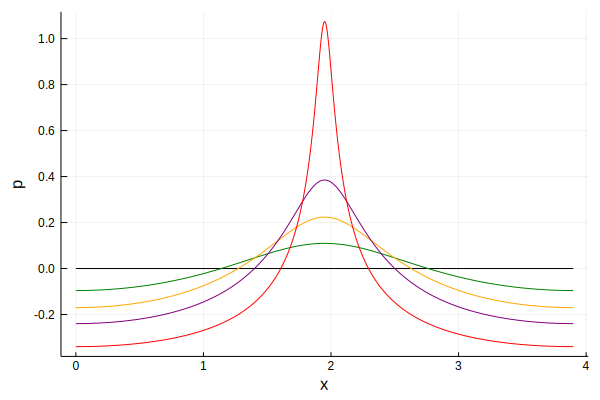

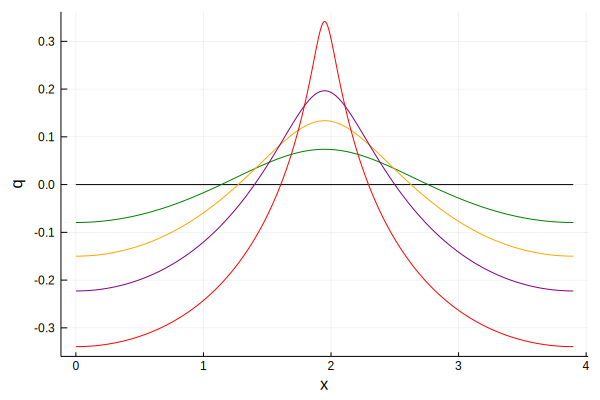

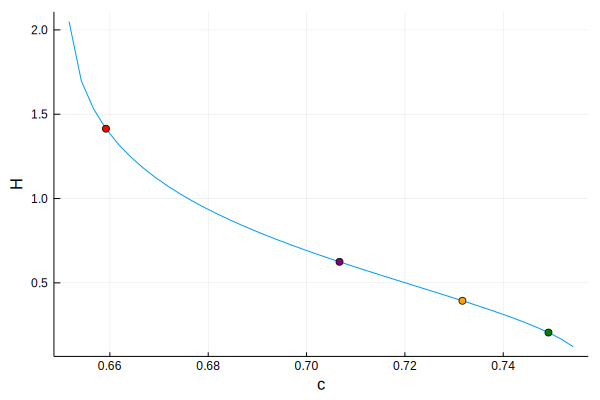

In [15]:
lop("NZMSolns390.out",3,10,20,39)

In [ ]:
lop("2piASMP.jld2",6,25,42,58)

In [ ]:
Nx = 512
k = [0:Nx;-Nx+1:-1]
Ker = [1;tanh.(k[2:2*Nx])/k[2:2*Nx]]
c = tanh(1)/1
Vec = zeros(Complex{Float64},4*Nx)
for j in 1:2*Nx
    Vec[2*j-1] = 1im*(c*k[j]+k[j]*Ker[j])
    Vec[2*j] = 1im*(c*k[j]-k[j]*Ker[j])
end
display(plot(imag(Vec)))

I lived bitch

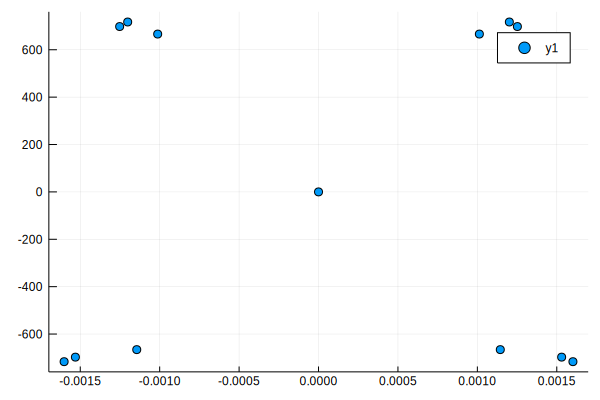


Max of values is: 0.001601662376011781
First six: Complex{Float64}[-9.40738e-17+1.22314e-16im, 2.73748e-17-1.45238e-16im, -6.67106e-17-1.34728e-17im, 8.86761e-17-3.51921e-17im, -6.79006e-17-3.00251e-17im, 7.88307e-17-1.64462e-16im]
Norm of first half: 0.9993125544799901

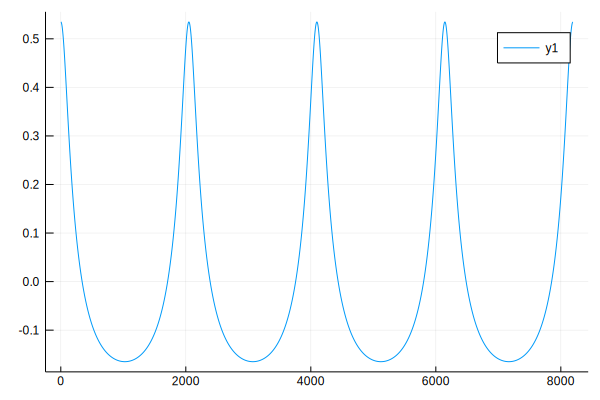

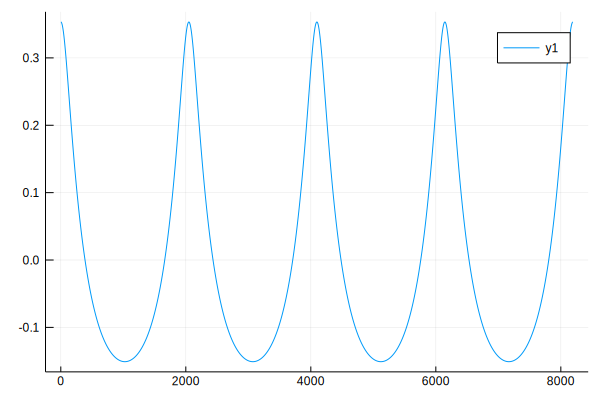


Maximum of Eigvec: 0.16462225289874197

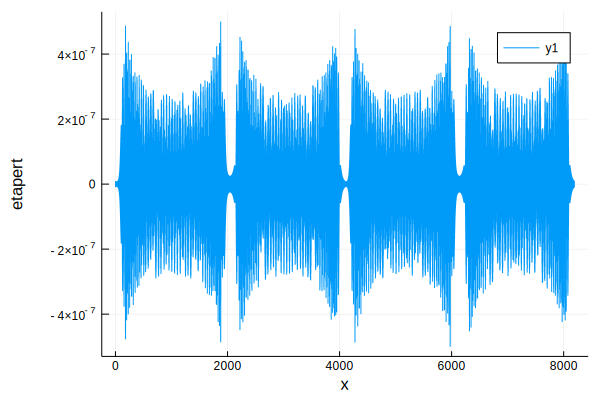

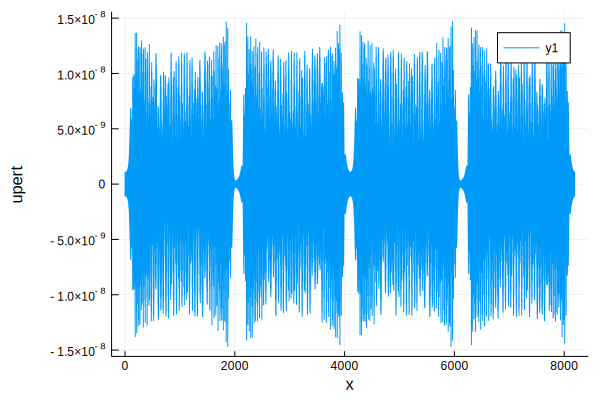


First few values of rpert: Complex{Float64}[3.43384e-18+0.0im, -4.41812e-18+9.88149e-18im, -1.2339e-17+2.31823e-18im, -1.15857e-17-1.48752e-17im, 1.36641e-17-1.49408e-17im, 8.66261e-18+1.20262e-17im, -9.36425e-18+8.71389e-18im]


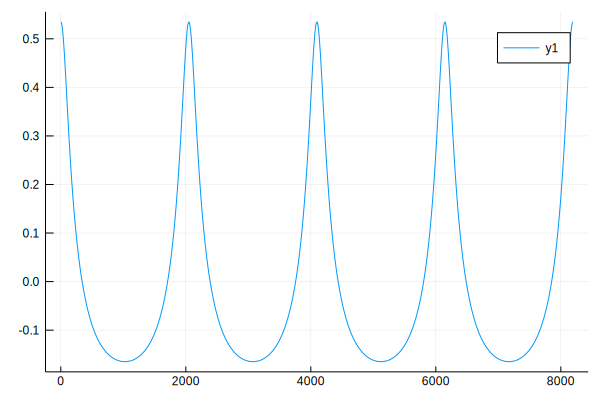

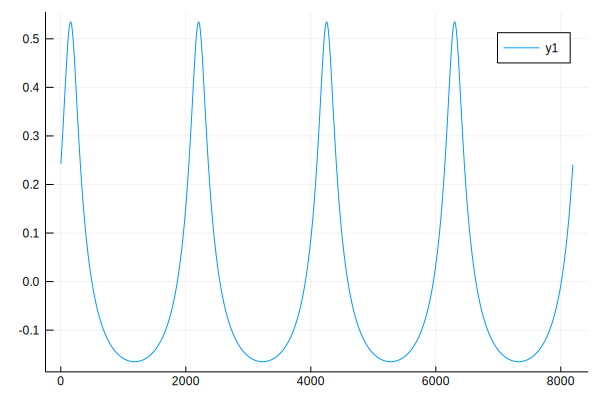

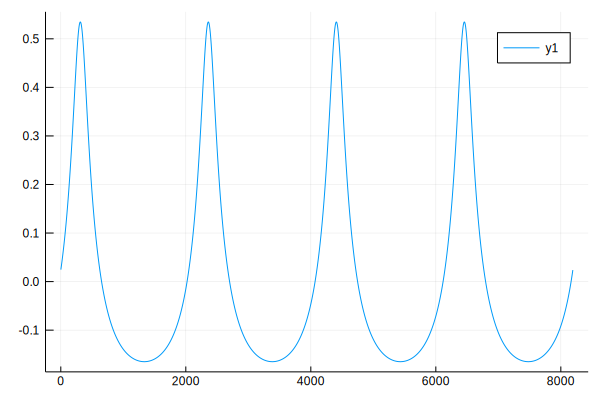

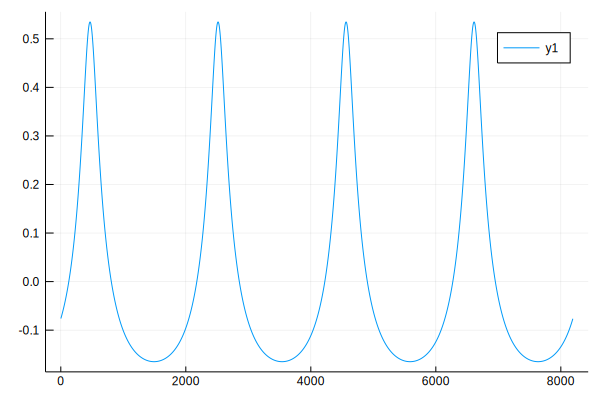

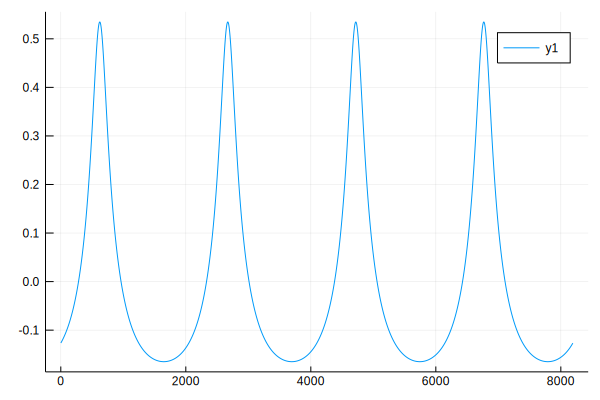

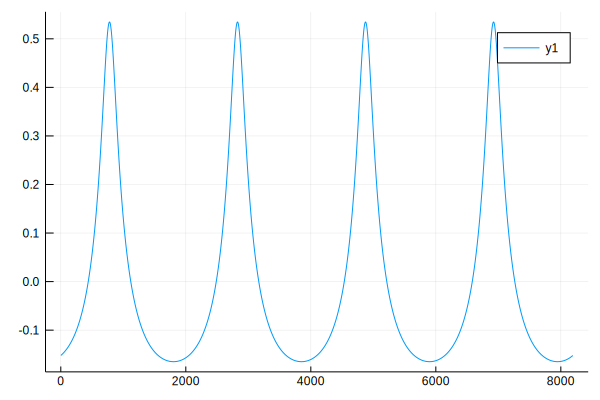

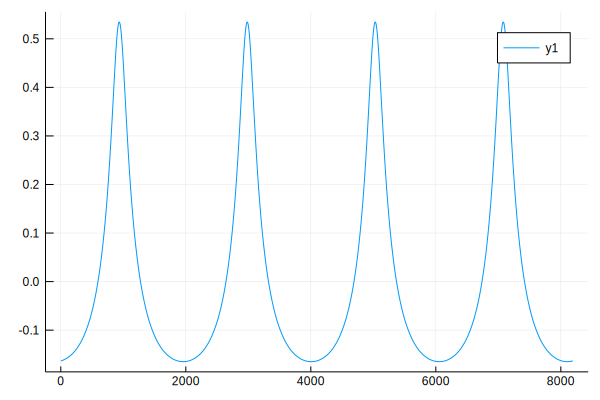

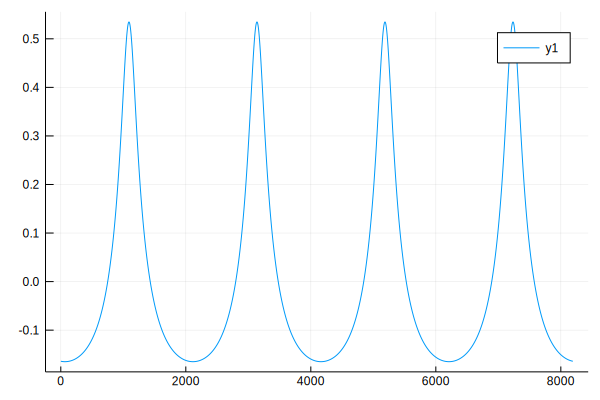

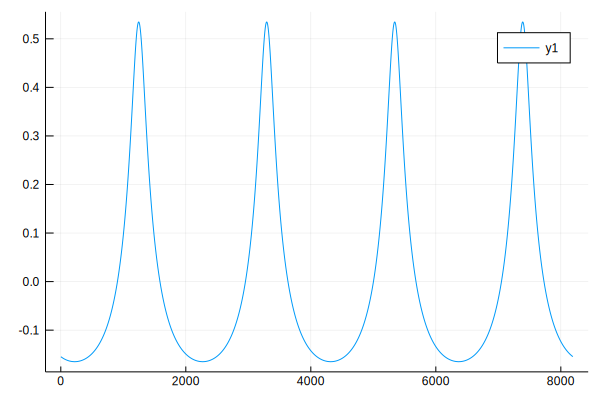

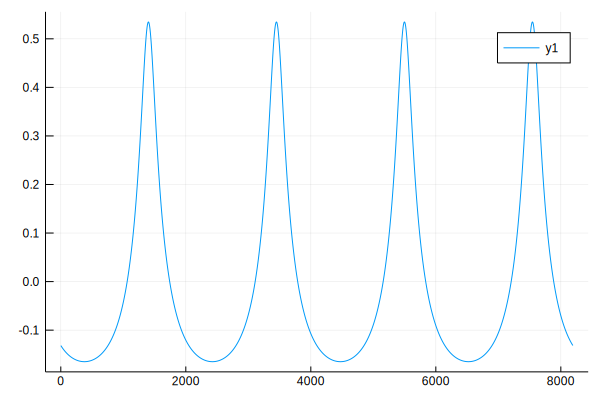

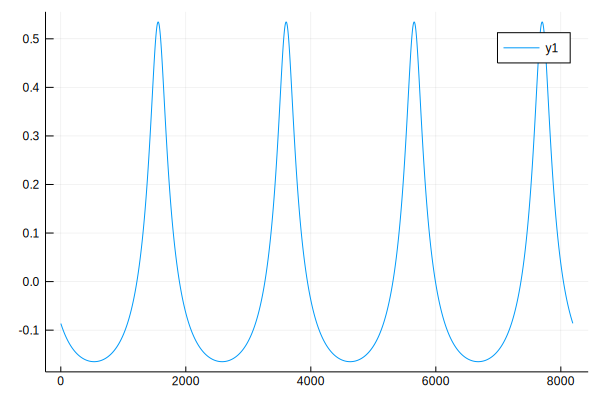

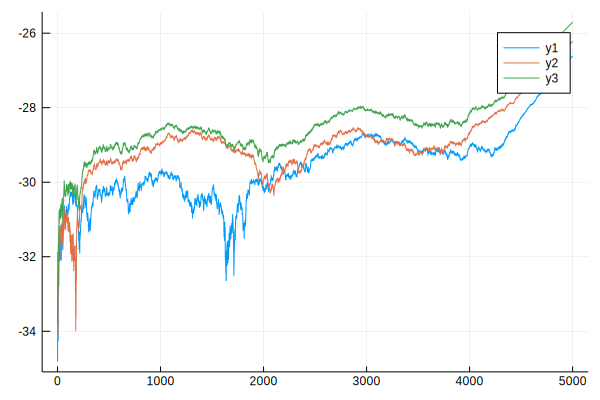

Total time for pert increase13813.37814516484
N error: 0.0049151999958791225
U Error: 1.2158005993683075e6


"Goodluck"

In [23]:
CanIRead("2pi.jld2",20)

In [ ]:
using DoubleFloats
using FastTransforms
using BenchmarkTools

In [ ]:
x = rand(ComplexF64, 1024)
y = rand(Complex{Double64}, 1024)

In [ ]:
@btime FastTransforms.generic_fft_pow2(x)
@btime FastTransforms.generic_fft_pow2(y)

In [ ]:
real(y).-Float64.(real(y))

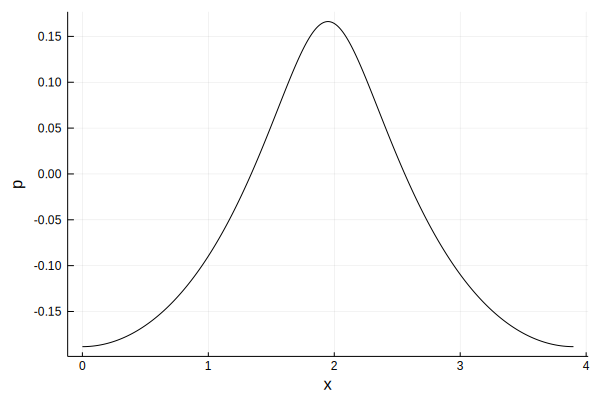

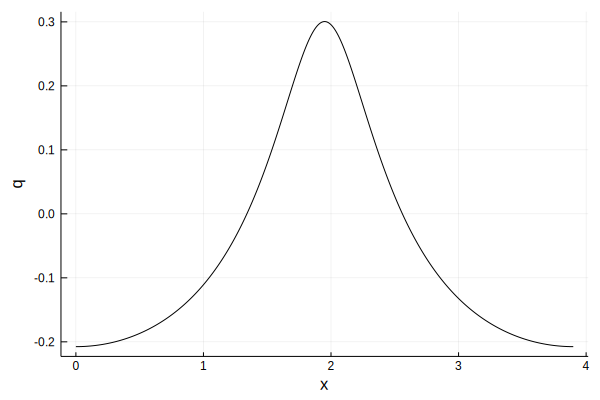

eta0: -0.05829277851487839 + 0.0im
u-c: -0.7697850683187076 + 0.0im
H: 0.5080222235352658

In [25]:

    help = readdlm("NZMSolns390.out")
    number = 15
    L=real(help[1,1])
    Nx = 4096
    dx = L/Nx
    x = collect(0:dx:(L-dx))
    u = help[number,4:Nx+3]
    et = help[number,Nx+4:2*Nx+3]
    etahat=ifft(et)
    uhat=ifft(u)
    print("eta0: ",etahat[1],"\n")
    print("u-c: ",-real(help[number,2])+uhat[1],"\n")
    print("H: ",real(help[number,3]))
    plt1 = plot(x,et,xlabel = "x", ylabel = "p",legend = false,color = :black)
    plt2 = plot(x,u,xlabel = "x", ylabel = "q",legend = false,color = :black)
    display(plt1)
    display(plt2)
    savefig(plt1,"ouretaHP.pdf")
    savefig(plt2,"ouruHP.pdf")

In [ ]:
function CanJohnRead(shit,number)    
    health = load(shit,"hello") 
    println("I lived bitch") 
    Nx = 1024
    uno = ones(Float64,Nx)
    L = real(health[number,1])
    mew = 1/5
    c = real(health[number,2])
    u = health[number,6:Nx+5]
    et = health[number,Nx+6:2*Nx+5]
    kaps = collect(1:Nx)
    k = ([0;kaps;-kaps[Nx:-1:1]])*2*pi/L
    ku = ([mew;kaps+mew*uno;-kaps[Nx:-1:1]+mew*uno])*2*pi/L
    Ker = tanh.(ku)
    Newu = zeros(Complex{Float64},4*Nx+1)
    Newet = zeros(Complex{Float64},4*Nx+1)
    
    B = zeros(Complex{Float64},4*Nx+2,4*Nx+2)
    B[1:2*Nx+1,1:2*Nx+1] = QuartersBitch(u,0.0,Nx)
    B[2*Nx+2:4*Nx+2,2*Nx+2:4*Nx+2] .= B[1:2*Nx+1,1:2*Nx+1]
    B[1:2*Nx+1,2*Nx+2:4*Nx+2] = QuartersBitch(et,0.0,Nx)
    D = zeros(Complex{Float64},4*Nx+2,4*Nx+2)
    D[1:2*Nx+1,1:2*Nx+1] = QuartersBitch1(u,Nx)
    D[2*Nx+2:4*Nx+2,2*Nx+2:4*Nx+2] .= D[1:2*Nx+1,1:2*Nx+1]
    D[1:2*Nx+1,2*Nx+2:4*Nx+2] = QuartersBitch1(et,Nx)
    for j in 1:2*Nx+1
       B[j,j] = c*ku[j]*1im
       B[j+2*Nx+1,j+2*Nx+1] = c*ku[j]*1im
       B[j,j+2*Nx+1] = -1im*ku[j]
    end
    Jack = -1im*Ker
    Jimmy = D*mew
    for j in 1:2*Nx+1
        Jimmy[j+2*Nx+1,j] = Jack[j]
    end
    Jimmy += B
    eta = ifft([0;et;et[Nx-1:-1:1]])*2*Nx
    u = ifft([0;u;u[Nx-1:-1:1]])*2*Nx
    N=length(eta)
    Nd2=div(N,2)
    Nd2p1=Nd2+1
    etaHat=fftshift(fft(eta))/N
    uHat=fftshift(fft(u))/N
    etaHat = [etaHat;etaHat[1]]
    uHat = [uHat;uHat[1]]
    kvecshifted=collect(-Nd2:Nd2)*(2.0*pi/L)
    L11Mat=c*Matrix((1.0+0.0im)I,N+1,N+1)
    L12Mat=-1*Matrix((1.0+0.0im)I,N+1,N+1)
 
    for m=-Nd2:Nd2
        for n=-Nd2+max(0,m):Nd2+min(0,m)
            L11Mat[n+Nd2p1,m+Nd2p1]-=uHat[n-m+Nd2p1]
            L12Mat[n+Nd2p1,m+Nd2p1]-=etaHat[n-m+Nd2p1]
        end
    end
        mu=1/5
        iKshifted=im*tanh.(1*(kvecshifted.+mu))
        ikvecmu=im*(kvecshifted.+mu)
        perm = zeros(Complex{Float64},2*Nx+1,2*Nx+1)
    for j in 1:Nx
        perm[Nx+j,j] = 1
        perm[j,Nx+1+j] = 1
    end
    perm[2*Nx+1,Nx+1] = 1
        LMat=[inv(perm)*(L11Mat.*ikvecmu)*perm inv(perm)*(L12Mat.*ikvecmu)*perm; inv(perm)*(-1*Matrix((1.0+0.0im)I,N+1,N+1).*iKshifted)*perm inv(perm)*(L11Mat.*ikvecmu)*perm]
    John = abs.(Jimmy-LMat)
    for i in 1:4*Nx+2
        for j in 1:4*Nx+2
            if John[i,j] < 10^(-10)
                John[i,j] = 0
            else
                print([i,j])
            end
        end
    end
    
    for i in 1:4*Nx+2
        for j in 1:4*Nx+2
            if abs(Jimmy[i,j]) < 10^(-10)
                Jimmy[i,j] = 0
            end
        end
    end
    display(UnicodePlots.spy(abs.(Jimmy)))
    for i in 1:4*Nx+2
        for j in 1:4*Nx+2
            if abs(LMat[i,j]) < 10^(-10)
                LMat[i,j] = 0
            end
        end
    end
    println(norm(John[2,1:2*Nx+1]))
    display(UnicodePlots.spy(abs.(LMat)))
    display(UnicodePlots.spy(abs.(John)))
    println("Max Error",maximum(John))
end

In [ ]:
CanJohnRead("2pi.jld2",2)